In [ ]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("cardio_train_new.csv")

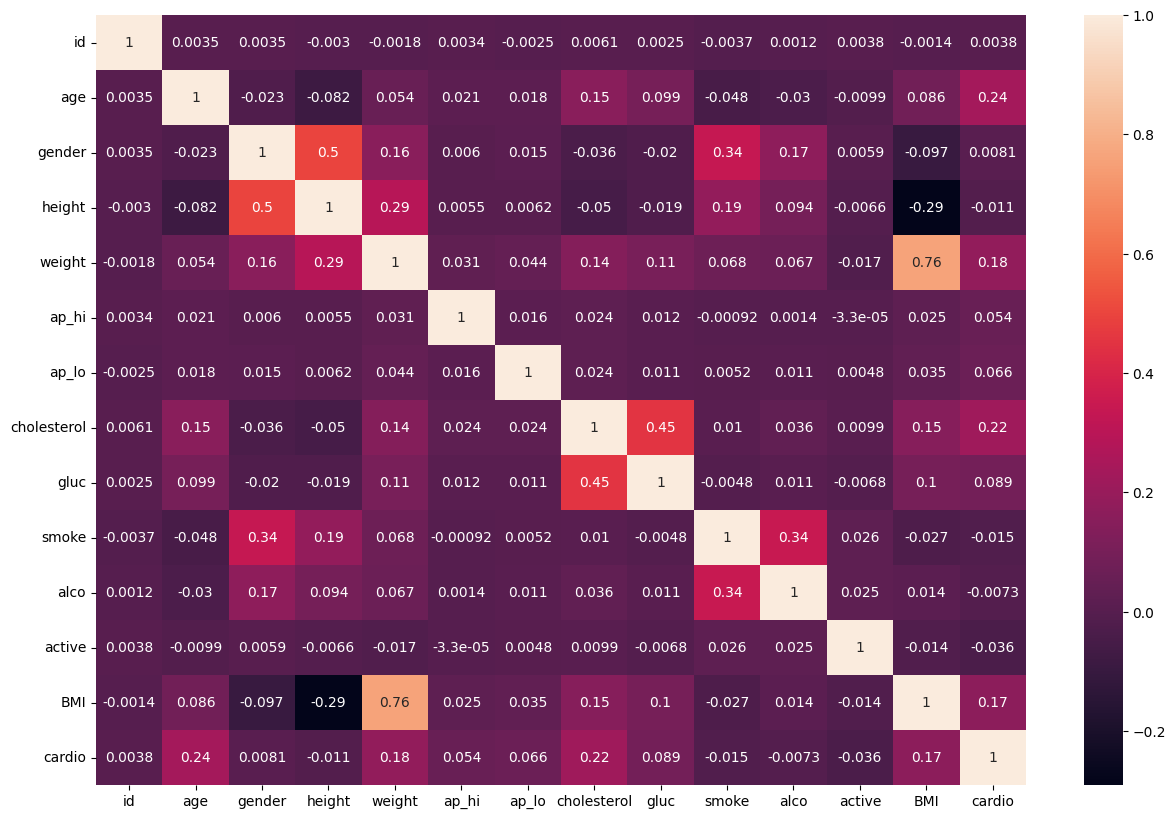

In [ ]:
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            annot=True, );

In [ ]:
df["BMI"] = round(df.weight/(df.height/100)**2, 2)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,21.97,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,34.93,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,23.51,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,28.71,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,23.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,26.93,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,50.47,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,31.35,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,27.10,1


In [ ]:
x = df.drop("cardio", axis=1)
y = df.cardio

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

np.random.seed(43)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = XGBClassifier(n_jobs=1)
clf.fit(x_train, y_train)

predict_species_list = clf.predict(x_test)
predict_species_list

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
clf.score(x_test, y_test)

0.7331428571428571

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score, classification_report
confusion_matrix(predict_species_list,y_test)

array([[5368, 2105],
       [1631, 4896]])

In [ ]:
f1_score(predict_species_list,y_test),accuracy_score(predict_species_list,y_test),r2_score(predict_species_list,y_test)

(0.7238320520402128, 0.7331428571428571, -0.07232469657223306)

In [ ]:
print(classification_report(predict_species_list,y_test))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      7473
           1       0.70      0.75      0.72      6527

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



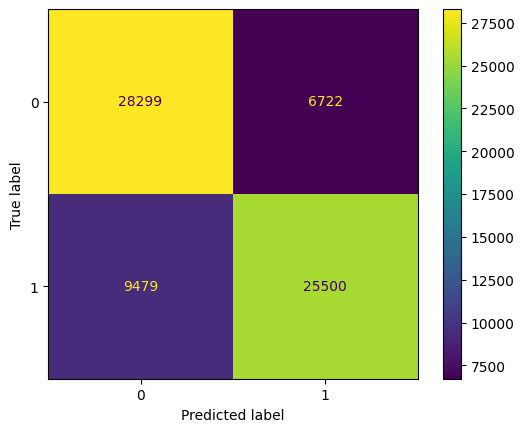

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y);

In [ ]:
clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None, 3, 5, 7],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2, 6],
          'min_samples_leaf': [1, 2, 4]}

In [ ]:
# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[14:23:29] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   7.3s
[14:23:36] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   4.7s
[14:23:41] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   6.6s
[14:23:48] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=None, max_features=auto, min_s

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
gs_clf.score(x_test,y_test)

0.7331428571428571